# Your name: Peter Gurka
## Assignment Name: CA04 - Ensemble Models

# Program Inititialization Section
## Enter your import packages here

In [84]:
# import packages 
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib notebook
%matplotlib inline
import seaborn as sns

from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import roc_auc_score
from sklearn import linear_model
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.linear_model import LogisticRegression


from IPython.display import Image  
!pip install graphviz
import graphviz
from sklearn.tree import export_graphviz
!pip install pydotplus
import pydotplus

from sklearn.metrics import roc_curve, f1_score, recall_score, precision_score, accuracy_score, classification_report, confusion_matrix, roc_auc_score

# Data File Reading Section
## Write code to read in data from external sources here

In [85]:
data = pd.read_csv('https://raw.githubusercontent.com/ArinB/CA05-B-Logistic-Regression/master/cvd_data.csv')

In [86]:
data

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4


# Data Quality Analysis

Perform a Data Quality Analysis to find missing values, outliers, NaNs etc. / Display descriptive statistics of each column

In [87]:
data.describe()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
count,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000,3242.000000
mean,0.590068,64.828809,1.094695,2.326342,1.368600,105.404832,37.550719,97.209904,82.945928,12.904010,0.430907,0.327884,0.067551,2.473782,2.281308,4.292721,3.864898
std,0.491897,10.400496,0.358237,0.697934,0.933871,10.280402,4.101003,13.598060,7.849650,20.156736,1.242444,0.469515,0.251012,0.672158,0.951695,1.021099,0.614247
min,0.000000,39.000000,1.000000,1.000000,1.000000,44.000000,25.000000,67.000000,57.400000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000
25%,0.000000,57.000000,1.000000,2.000000,1.000000,99.000000,34.425000,88.000000,78.200000,0.000000,0.000000,0.000000,0.000000,2.000000,2.000000,4.000000,4.000000
50%,1.000000,65.000000,1.000000,2.000000,1.000000,104.000000,37.150000,97.000000,82.550000,0.300000,0.000000,0.000000,0.000000,3.000000,2.000000,4.000000,4.000000
75%,1.000000,73.000000,1.000000,3.000000,1.000000,110.000000,40.500000,106.000000,86.575000,20.475000,0.000000,1.000000,0.000000,3.000000,3.000000,5.000000,4.000000
max,1.000000,90.000000,3.000000,4.000000,8.000000,168.000000,53.000000,135.000000,136.700000,170.500000,30.000000,1.000000,1.000000,3.000000,6.000000,6.000000,5.000000


In [88]:
data.shape

(3242, 17)

In [89]:
data.count()

cvd_4types      3242
age_s1          3242
race            3242
educat          3242
mstat           3242
hip             3242
neck20          3242
waist           3242
av_weight_kg    3242
cgpkyr          3242
tea15           3242
srhype          3242
parrptdiab      3242
bend25          3242
happy25         3242
tired25         3242
hlthlm25        3242
dtype: int64

In [90]:
data.isnull().sum()

cvd_4types      0
age_s1          0
race            0
educat          0
mstat           0
hip             0
neck20          0
waist           0
av_weight_kg    0
cgpkyr          0
tea15           0
srhype          0
parrptdiab      0
bend25          0
happy25         0
tired25         0
hlthlm25        0
dtype: int64

In [91]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3242 entries, 0 to 3241
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   cvd_4types    3242 non-null   int64  
 1   age_s1        3242 non-null   int64  
 2   race          3242 non-null   int64  
 3   educat        3242 non-null   int64  
 4   mstat         3242 non-null   int64  
 5   hip           3242 non-null   float64
 6   neck20        3242 non-null   float64
 7   waist         3242 non-null   float64
 8   av_weight_kg  3242 non-null   float64
 9   cgpkyr        3242 non-null   float64
 10  tea15         3242 non-null   int64  
 11  srhype        3242 non-null   int64  
 12  parrptdiab    3242 non-null   int64  
 13  bend25        3242 non-null   int64  
 14  happy25       3242 non-null   int64  
 15  tired25       3242 non-null   int64  
 16  hlthlm25      3242 non-null   int64  
dtypes: float64(5), int64(12)
memory usage: 430.7 KB


In [92]:
data.head()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
0,0,54,1,2,1,110.0,40.0,108.0,87.5,34.0,0,1,0,1,2,3,4
1,0,56,3,2,1,113.0,34.0,107.0,83.5,0.0,0,0,0,2,2,1,3
2,0,54,1,3,1,110.0,44.5,105.0,86.2,49.5,0,0,0,3,2,6,4
3,0,54,1,3,1,129.0,42.5,110.0,89.1,0.0,0,0,0,3,2,1,3
4,0,51,3,2,1,122.0,37.0,113.0,81.3,0.0,0,0,0,2,1,1,2


In [93]:
data.tail()

,cvd_4types,age_s1,race,educat,mstat,hip,neck20,waist,av_weight_kg,cgpkyr,tea15,srhype,parrptdiab,bend25,happy25,tired25,hlthlm25
3237,1,66,1,2,1,95.0,41.5,99.0,88.2,0.0,0,1,0,2,2,5,4
3238,1,54,1,3,1,99.0,34.9,99.0,83.3,30.0,0,0,0,3,3,3,4
3239,1,55,1,4,1,101.0,37.0,91.0,75.2,0.0,0,0,0,3,2,5,4
3240,1,53,1,2,1,98.0,39.0,93.0,79.0,0.0,0,0,0,2,2,5,4
3241,1,54,1,2,1,109.0,48.6,112.0,93.5,39.0,0,1,0,3,2,5,4


## Cleansing the dataset

Perform necessary data cleansing and transformation based on your
observations from the data quality analysis

#### Dropping columns that aren't required
All columns are required it seems at this time
#### Dropping rows where no data is available
There are no missing values according to my data quality analysis

In [94]:
# Displaying  final columns
data.columns

Index(['cvd_4types', 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
       'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
       'bend25', 'happy25', 'tired25', 'hlthlm25'],
      dtype='object')

# Prepare Data for Model

In [95]:
#split data into test and train
X = data[[ 'age_s1', 'race', 'educat', 'mstat', 'hip', 'neck20',
 'waist', 'av_weight_kg', 'cgpkyr', 'tea15', 'srhype', 'parrptdiab',
 'bend25', 'happy25', 'tired25', 'hlthlm25']]

y = data['cvd_4types']

x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=123)

# Binary Classifier Model

### Build a binary Classifier Model to predict the CVD Risk (Yes/No, or 1/0) using a Logistic Regression Model with the best performance possible (deliverable: Notebook)

In [96]:
# fit (train) the Logistic Regression classifier
logreg = LogisticRegression(C=1e40, solver='newton-cg', random_state=101, penalty= 'l2')
logreg.fit(x_train, y_train)

LogisticRegression(C=1e+40, random_state=101, solver='newton-cg')

# Feature Importance

### Display the Feature Importance of all the features sorted in the order of decreasing influence on the CVD Risk (deliverable: Notebook)

In [114]:
m = LogisticRegression()
m.fit(X, y)

print(m.coef_)

print(np.std(X,0)*logreg.coef_[0])

[[ 0.01240097 -0.58793455  0.37625221 -0.0978042  -0.04113974 -0.00924296
   0.06947446 -0.02158012  0.00110678 -0.06106163  0.11118951  0.17256822
   0.23577811 -0.02410327  0.13909035 -0.51525349]]
age_s1          0.029149
race           -0.420503
educat          0.171957
mstat          -0.127352
hip            -0.583253
neck20         -0.178484
waist           1.114836
av_weight_kg   -0.222299
cgpkyr         -0.034876
tea15          -0.066759
srhype          0.081984
parrptdiab      0.163488
bend25          0.138380
happy25        -0.052870
tired25         0.063922
hlthlm25       -0.328160
dtype: float64


/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


# Evaluate Performance of the Model

### Evaluate the performance of your model (including ROC Curve), explain the performance and draw a meaningful conclusion. (deliverable: Performance outputs in Notebook, explanation and conclusion in Word/PDF document)

In [105]:
# accuracy 
print(accuracy_score(y_test, y_pred))

0.7550077041602465


In [99]:
# confusion matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
print(confusion_matrix)

[[163  98]
 [ 61 327]]


In [100]:
#classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.73      0.62      0.67       261
           1       0.77      0.84      0.80       388

    accuracy                           0.76       649
   macro avg       0.75      0.73      0.74       649
weighted avg       0.75      0.76      0.75       649



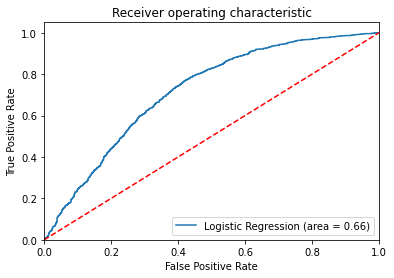

In [104]:
# ROC Curve
logit_roc_auc = roc_auc_score(y, logreg.predict(X))
fpr, tpr, thresholds = roc_curve(y, logreg.predict_proba(X)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()